In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 데이터 불러오기
**필요한 데이터만 추출하고, 데이터 타입이 object인 데이터를 숫자형으로 변경시킨다.**

In [2]:
df = pd.read_csv("C:\\Users\\admin\\Desktop\\lol\\df.csv", encoding = "cp949")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df

,Unnamed: 0,assists,champLevel,championId,combatPlayerScore,damageDealtToObjectives,damageDealtToTurrets,damageSelfMitigated,deaths,doubleKills,...,trueDamageDealt,trueDamageDealtToChampions,trueDamageTaken,turretKills,unrealKills,visionScore,visionWardsBoughtInGame,wardsKilled,wardsPlaced,win
0,0,17,13,43,0,569,132,15476,5,0,...,666,666,698,0,0,69,6,7.0,30.0,False
1,1,9,16,429,0,3602,3602,18814,8,2,...,7820,1149,864,0,0,28,1,6.0,10.0,False
2,2,7,16,131,0,4960,221,26786,5,0,...,5678,1262,782,0,0,23,1,4.0,11.0,False
3,3,3,14,78,0,230,0,34917,9,0,...,2720,0,3872,0,0,25,4,1.0,14.0,False
4,4,9,15,106,0,10339,0,29438,6,0,...,6539,1176,1194,0,0,17,3,3.0,4.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514575,629265,9,15,429,0,8393,7035,12646,6,1,...,2521,1443,985,3,0,28,3,7.0,8.0,False
514576,629266,10,14,517,0,24938,0,25961,11,2,...,13875,2493,2097,0,0,26,7,6.0,7.0,False
514577,629267,7,15,142,0,2789,815,8238,8,2,...,7458,4981,990,0,0,14,2,1.0,10.0,False
514578,629268,7,15,126,0,12275,4895,11597,7,0,...,3139,1443,487,2,0,42,7,4.0,15.0,False


In [5]:
df.drop(["Unnamed: 0"], axis = 1, inplace = True)

In [7]:
df["firstBloodAssist"] = pd.to_numeric(df["firstBloodAssist"])
df["firstBloodKill"] = pd.to_numeric(df["firstBloodKill"])
df["firstTowerAssist"] = pd.to_numeric(df["firstTowerAssist"])
df["firstTowerKill"] = pd.to_numeric(df["firstTowerKill"])

# 독립변수들 간 상관관계를 확인하기

In [9]:
df.corr()

,assists,champLevel,championId,combatPlayerScore,damageDealtToObjectives,damageDealtToTurrets,damageSelfMitigated,deaths,doubleKills,firstBloodAssist,...,trueDamageDealt,trueDamageDealtToChampions,trueDamageTaken,turretKills,unrealKills,visionScore,visionWardsBoughtInGame,wardsKilled,wardsPlaced,win
assists,1.000000,0.460307,0.022990,NaN,0.220749,0.118994,0.369536,0.157392,0.071505,NaN,...,0.100762,0.162431,0.202832,0.133200,-0.001356,0.563830,0.359147,0.379466,0.479719,0.348450
champLevel,0.460307,1.000000,-0.059357,NaN,0.445258,0.412436,0.559619,0.306088,0.323738,NaN,...,0.209955,0.337282,0.382159,0.379011,-0.000109,0.319604,0.104057,0.272907,0.185919,0.212118
championId,0.022990,-0.059357,1.000000,NaN,-0.096887,-0.005043,0.039068,0.004209,-0.025346,NaN,...,0.062078,0.111188,0.006187,-0.021004,-0.000602,0.096964,0.082581,0.104364,0.119524,-0.004599
combatPlayerScore,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
damageDealtToObjectives,0.220749,0.445258,-0.096887,NaN,1.000000,0.419909,0.276161,-0.045688,0.320161,NaN,...,0.297005,0.252487,0.127573,0.475234,-0.000116,0.088618,0.064203,0.174272,-0.105684,0.349223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
visionScore,0.563830,0.319604,0.096964,NaN,0.088618,-0.029728,0.251052,0.189473,-0.007736,NaN,...,0.064931,0.162848,0.106181,-0.001590,-0.001619,1.000000,0.659615,0.750499,0.878038,0.098355
visionWardsBoughtInGame,0.359147,0.104057,0.082581,NaN,0.064203,-0.152057,0.150291,0.083543,-0.076138,NaN,...,0.053546,0.067681,0.029511,-0.094625,-0.001389,0.659615,1.000000,0.475719,0.682384,0.025278
wardsKilled,0.379466,0.272907,0.104364,NaN,0.174272,0.007297,0.172312,0.131896,0.052078,NaN,...,0.077816,0.145677,0.072665,0.035752,-0.001369,0.750499,0.475719,1.000000,0.534924,0.061771
wardsPlaced,0.479719,0.185919,0.119524,NaN,-0.105684,-0.080834,0.169929,0.176413,-0.078483,NaN,...,-0.013301,0.079125,0.056633,-0.075150,-0.001393,0.878038,0.682384,0.534924,1.000000,0.029699


In [10]:
df.corrwith(df["win"]).sort_values(ascending = False).head(20)

win                                1.000000
damageDealtToTurrets               0.419532
turretKills                        0.417532
largestKillingSpree                0.352077
damageDealtToObjectives            0.349223
assists                            0.348450
kills                              0.294945
inhibitorKills                     0.294845
killingSprees                      0.266969
goldEarned                         0.248666
neutralMinionsKilledEnemyJungle    0.243610
largestMultiKill                   0.243533
doubleKills                        0.217995
champLevel                         0.212118
playerScore6                       0.191171
perk1Var1                          0.163351
goldSpent                          0.152196
totalDamageDealtToChampions        0.140349
firstTowerKill                     0.138212
totalDamageDealt                   0.133008
dtype: float64

In [11]:
a = df.corrwith(df["win"]).sort_values(ascending = False)
li = []
for i in range(0, 14, 1):
    li.append(a.index[i])
    
li

['win',
 'damageDealtToTurrets',
 'turretKills',
 'largestKillingSpree',
 'damageDealtToObjectives',
 'assists',
 'kills',
 'inhibitorKills',
 'killingSprees',
 'goldEarned',
 'neutralMinionsKilledEnemyJungle',
 'largestMultiKill',
 'doubleKills',
 'champLevel']

In [12]:
data = df[li]
data

,win,damageDealtToTurrets,turretKills,largestKillingSpree,damageDealtToObjectives,assists,kills,inhibitorKills,killingSprees,goldEarned,neutralMinionsKilledEnemyJungle,largestMultiKill,doubleKills,champLevel
0,False,132,0,2,569,17,2,0,1,7657,0.0,1,0,13
1,False,3602,0,4,3602,9,10,0,3,15223,4.0,2,2,16
2,False,221,0,2,4960,7,5,0,1,11428,0.0,1,0,16
3,False,0,0,0,230,3,2,0,0,8164,0.0,1,0,14
4,False,0,0,0,10339,9,3,0,0,9950,0.0,1,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514575,False,7035,3,4,8393,9,9,0,3,14370,0.0,2,1,15
514576,False,0,0,3,24938,10,9,0,3,12743,23.0,2,2,14
514577,False,815,0,5,2789,7,9,0,2,12314,0.0,2,2,15
514578,False,4895,2,2,12275,7,5,0,2,12023,0.0,1,0,15


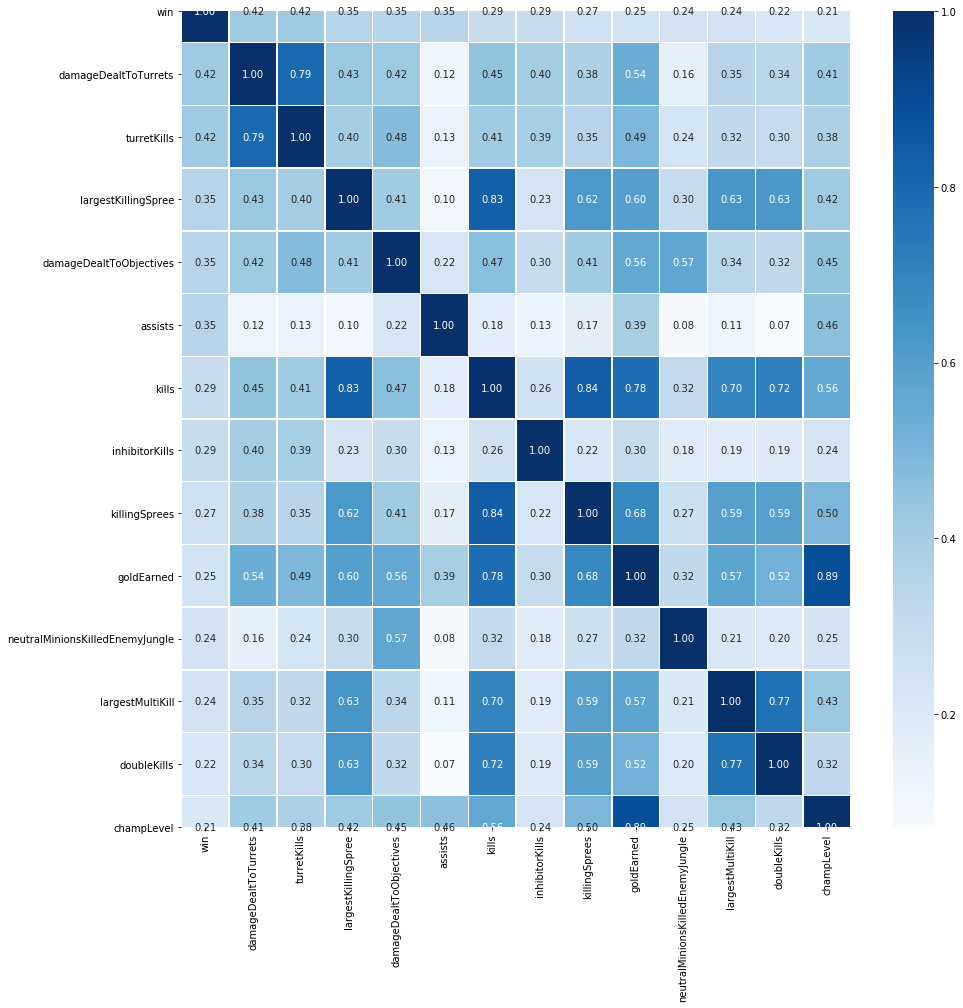

In [13]:
plt.figure(figsize=(15,15))
sns.heatmap(data = data.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

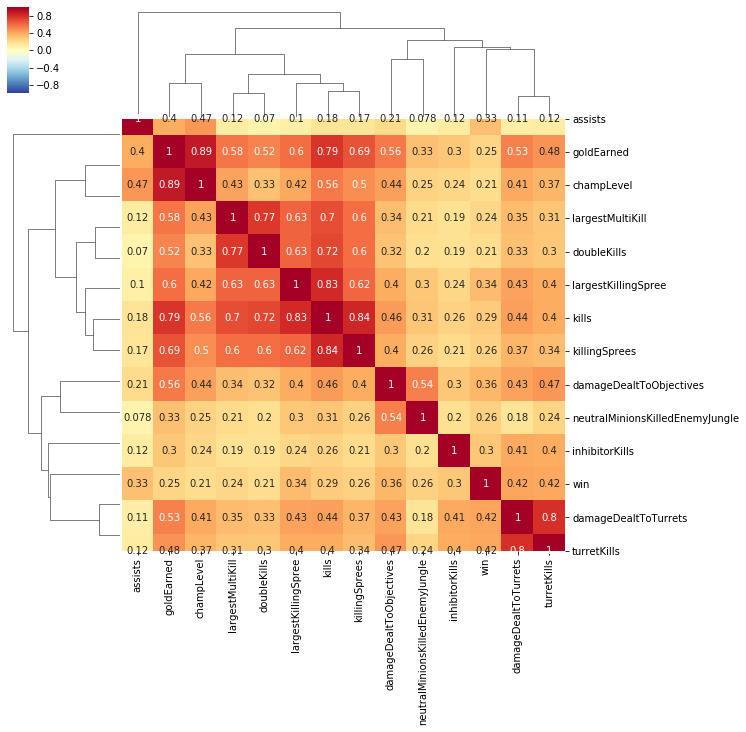

In [16]:
df = data.corr()

sns.clustermap(df, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )

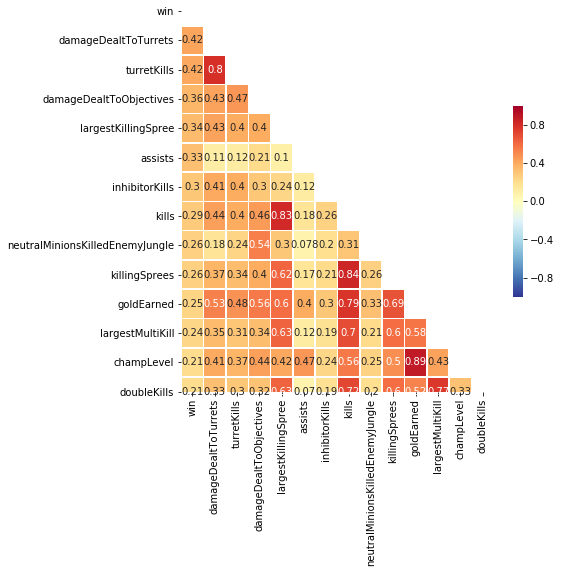

In [17]:
df = data.corr()
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(7,7) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(df, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

# 데이터 셋 정규화
**평균은 0, 표준편차는 1**

In [14]:
data

,win,damageDealtToTurrets,turretKills,largestKillingSpree,damageDealtToObjectives,assists,kills,inhibitorKills,killingSprees,goldEarned,neutralMinionsKilledEnemyJungle,largestMultiKill,doubleKills,champLevel
0,False,132,0,2,569,17,2,0,1,7657,0.0,1,0,13
1,False,3602,0,4,3602,9,10,0,3,15223,4.0,2,2,16
2,False,221,0,2,4960,7,5,0,1,11428,0.0,1,0,16
3,False,0,0,0,230,3,2,0,0,8164,0.0,1,0,14
4,False,0,0,0,10339,9,3,0,0,9950,0.0,1,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514575,False,7035,3,4,8393,9,9,0,3,14370,0.0,2,1,15
514576,False,0,0,3,24938,10,9,0,3,12743,23.0,2,2,14
514577,False,815,0,5,2789,7,9,0,2,12314,0.0,2,2,15
514578,False,4895,2,2,12275,7,5,0,2,12023,0.0,1,0,15


In [24]:
X = data[['damageDealtToTurrets', 'turretKills', 'largestKillingSpree', 'damageDealtToObjectives', 'assists', 'kills', 'inhibitorKills', 'killingSprees', 'goldEarned',
 'neutralMinionsKilledEnemyJungle', 'largestMultiKill', 'doubleKills', 'champLevel']]
y = data["win"]


In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
np.mean(X_scaled), np.std(X_scaled)

(1.8320304694179583e-17, 1.0000000000000004)

In [68]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()
robust_scaler.fit(X)
X_robust_scaled = robust_scaler.transform(X)
np.mean(X_robust_scaled), np.std(X_robust_scaled)

(0.2758306325510026, 0.9265748021592922)

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
np.mean(X_scaled), np.std(X_scaled)

(0.16487405386033085, 0.21264324312238803)

In [20]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
np.mean(X_scaled), np.std(X_scaled)

(0.16715183478685575, 0.21579573405106411)

# train 데이터와 test 데이터 나누기

In [29]:
y = pd.get_dummies(y)
y = y.to_numpy()
#z = pd.to_numeric(data["win"])
#z

In [30]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_scaled, z, test_size=0.3, random_state=0)
print(len(x_train), " ");print(len(x_test))
print(len(y_train), " "); print(len(y_test))

360206  
154374
360206  
154374


# 로지스틱 회귀 

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm
 
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
 
'''    x2 = sm.add_constant(X_scaled)
    model = sm.OLS(y, x2)
    result = model.fit()
    print(result.summary())    '''

y_pred = log_reg.predict(x_test)
print(y_pred)
print(list(y_test))
 
print('정확도 :', metrics.accuracy_score(y_test, y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[False  True False ... False False  True]
[False, True, True, True, False, True, True, True, True, False, True, False, False, False, True, False, False, True, True, False, False, False, True, False, False, False, True, False, True, False, False, False, True, False, True, True, True, True, False, False, True, True, False, True, True, True, False, False, True, True, True, False, True, False, False, True, False, False, True, True, True, False, False, False, True, False, True, True, False, False, False, False, True, False, True, False, True, True, False, True, False, True, False, True, True, True, False, True, True, True, True, False, False, True, True, False, True, True, False, True, True, False, True, False, False, False, True, False, False, False, False, True, True, True, False, True, False, True, False, True, True, True, False, True, False, False, False, True, True, True, False, True, True, False, False, False, False, True, False, False, True, False, False, True, False, True, True, Fal

In [32]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

print(model.score(x_train, y_train))
print(model.score(x_test, y_test))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8198530840685607
0.8197105730239548


In [33]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_pred, y_test)

array([[65344, 16345],
       [11487, 61198]], dtype=int64)

# 의사결정나무

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from IPython.display import Image
import os

dt_clf = DecisionTreeClassifier(random_state = 0)
dt_clf = dt_clf.fit(x_train, y_train)
dt_prediction = dt_clf.predict(x_test)

print("Train set : {:.2f}".format(dt_clf.score(x_train, y_train)))
print("Train set : {:.2f}".format(dt_clf.score(x_test, y_test)))

Train set : 1.00
Train set : 0.77


In [35]:
tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(x_train, y_train)

from sklearn.metrics import accuracy_score

y_pred_tr = tree.predict(x_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_tr))

Accuracy: 0.72


In [36]:
from IPython import display
import graphviz
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import pydotplus

target_name = ["loss", "win"]

dot_data = export_graphviz(tree, out_file=None, feature_names=["damageDealtToTurrets", "turretKills", "damageDealtToObjectives", "largestKillingSpree", "assists", "inhibitorKills",
        "kills", "neutralMinionsKilledEnemyJungle", "killingSprees", "goldEarned", "largestMultiKill", "champLevel","doubleKills"],
                          class_names=target_name, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)

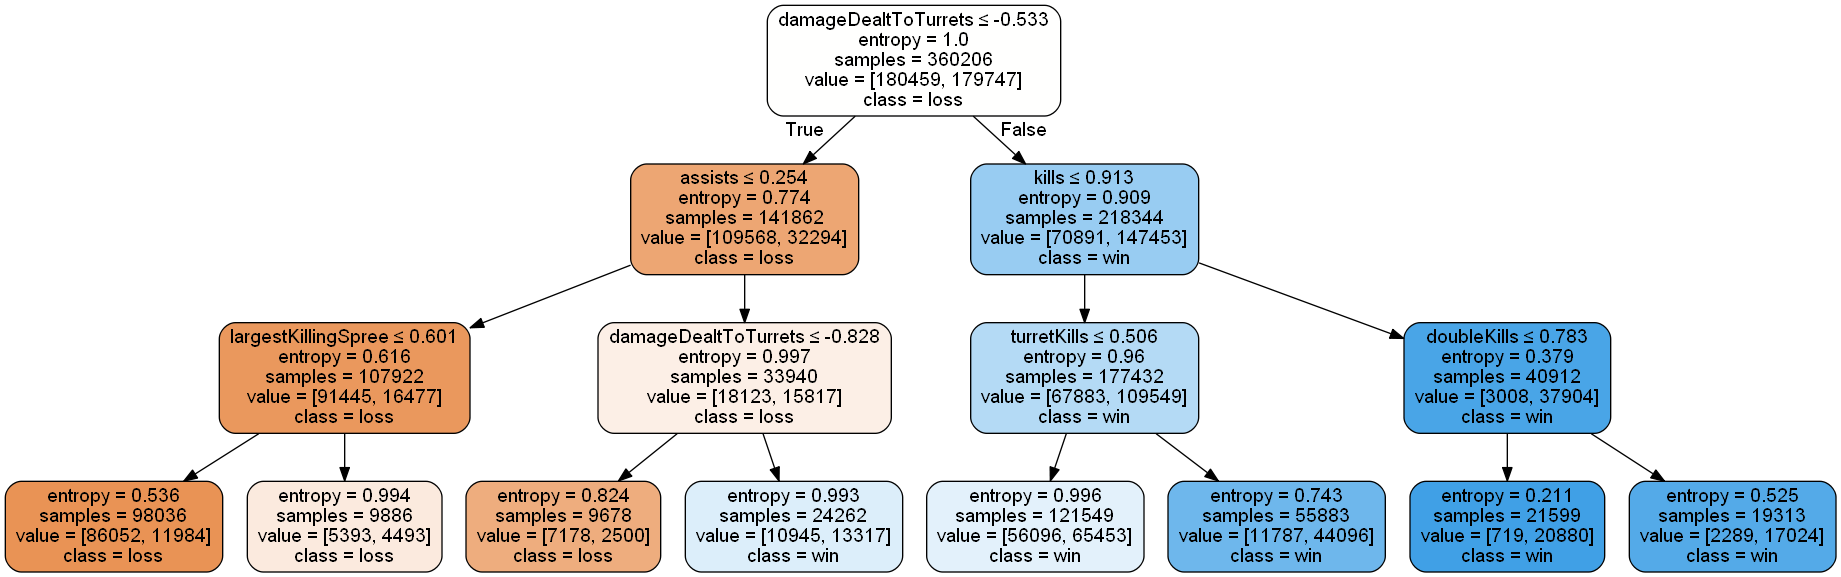

In [37]:
os.environ["PATH"] += os.pathsep + "C:/Program Files (x86)/Graphviz2.38/bin/"
Image(graph.create_png())

# 소프트 벡터 머신

In [ ]:
from sklearn import svm

clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train)

print(clf.predict(newData))

In [ ]:
# 샘플 데이터 표현
plt.scatter(X[:,0], X[:,1], c=y, s=30, cmap=plt.cm.Paired)
 
# 초평면(Hyper-Plane) 표현
ax = plt.gca()
 
xlim = ax.get_xlim()
ylim = ax.get_ylim()
 
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
 
ax.contour(XX, YY, Z, colors='k', levels=[-1,0,1], alpha=0.5, linestyles=['--', '-', '--'])
 
# 지지벡터(Support Vector) 표현
ax.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=60, facecolors='r')
 
plt.show()

# KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)
knn.fit(x_train, y_train)

prediction = knn.predict(x_test)
results = [y[p] for p in prediction]
print('results의 처음 6개 ==> {}'.format(results[:6]))

bins = np.bincount(prediction)
count = {n:c for n, c in zip(y, bins)}
print('test 결과의 빈도수 ==> {}'.format(count))

results의 처음 6개 ==> [0        1
1        1
2        1
3        1
4        1
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       1
16       1
17       1
18       1
19       1
20       0
21       0
22       0
23       0
24       0
25       1
26       1
27       1
28       1
29       1
        ..
52970    0
52971    0
52972    0
52973    0
52974    0
52975    1
52976    1
52977    1
52978    1
52979    1
52980    0
52981    0
52982    0
52983    0
52984    0
52985    1
52986    1
52987    1
52988    1
52989    1
52990    0
52991    0
52992    0
52993    0
52994    0
52995    1
52996    1
52997    1
52998    1
52999    1
Length: 200351, dtype: uint8, 0        1
1        1
2        1
3        1
4        1
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       1
16       1
17       1
18       1
19       1
20       0
21       0
22       0
23       0
24       0
25  

In [20]:
# 정확도 구하기
print('score 메소드 이용 ==> {:.3f}'.format(knn.score(x_test, y_test)))

y_pred = knn.predict(x_test)
print('numpy 이용 ==> {:.3f}'.format(np.mean(y_pred == y_test)))

score 메소드 이용 ==> 0.759
numpy 이용 ==> 0.759


In [22]:
# 시각화
# matplotlib.rc('font', family='AppleGothic') # 한글출력
# plt.rcParams['axes.unicode_minus'] = False # 축 - 표시

pd.scatter_matrix(x_train,
                  c=y_train, # 색깔로 구분할 데이터
                  hist_kwds={'bins':30}, # 히스토그램
                  marker='o', # marker
                  s=20, # size
                  alpha=0.5) # 투명도

plt.show()

C:\Users\zkmm0\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  from ipykernel import kernelapp as app


AttributeError: 'numpy.ndarray' object has no attribute '_get_numeric_data'

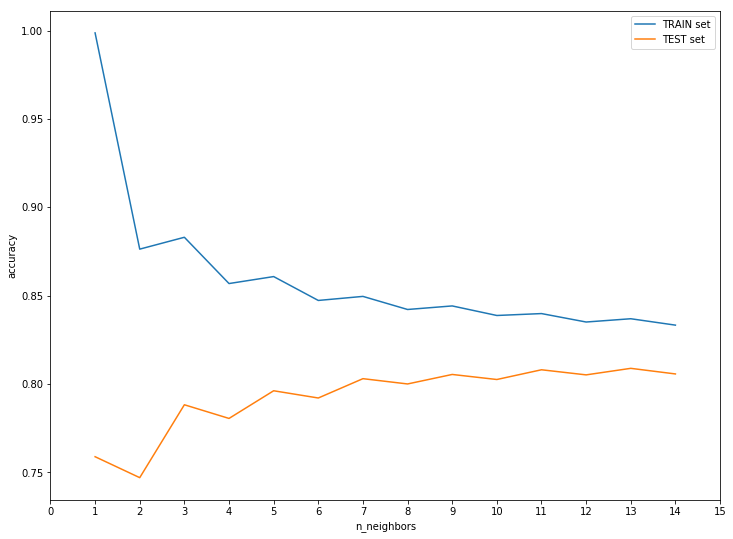

In [23]:
train_acc = []
test_acc = []

for n in range(1,15):
    clf = KNeighborsClassifier(n_jobs=-1, n_neighbors=n)
    clf.fit(x_train, y_train)
    prediction = clf.predict(x_test)
    train_acc.append(clf.score(x_train, y_train))
    test_acc.append((prediction==y_test).mean())
    
plt.figure(figsize=(12, 9))
plt.plot(range(1, 15), train_acc, label='TRAIN set')
plt.plot(range(1, 15), test_acc, label='TEST set')
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.xticks(np.arange(0, 16, step=1))
plt.legend()

# 랜덤포레스트

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=123456, verbose=0,
            warm_start=False)

In [25]:
from sklearn.metrics import accuracy_score

predicted = rf.predict(x_test)
accuracy = accuracy_score(y_test, predicted)

print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')

Out-of-bag score estimate: 0.83
Mean accuracy score: 0.83


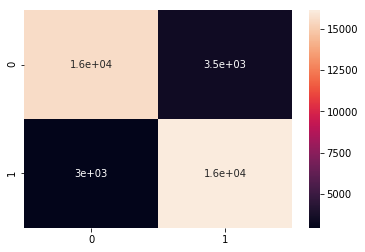

In [28]:
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_test, predicted))
sns.heatmap(cm, annot=True)

b

# 5개 데이터를 묶어서 사용하기

In [2]:
d_team = pd.read_csv("C:\\Users\\admin\\Desktop\\lol\\df_team.csv", encoding = "cp949")
r_team = pd.read_csv("C:\\Users\\admin\\Desktop\\lol\\result_team.csv", encoding = "cp949")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (10,11,108,109,206,207,304,305,402,403) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
d_team

,assists,champLevel,championId,combatPlayerScore,damageDealtToObjectives,damageDealtToTurrets,damageSelfMitigated,deaths,doubleKills,firstBloodAssist,...,tripleKills.4,trueDamageDealt.4,trueDamageDealtToChampions.4,trueDamageTaken.4,turretKills.4,unrealKills.4,visionScore.4,visionWardsBoughtInGame.4,wardsKilled.4,wardsPlaced.4
0,17,13,43,0,569,132,15476,5,0,False,...,0,6539,1176,1194,0,0,17,3,3.0,4.0
1,15,14,235,0,7412,4074,12738,4,0,False,...,0,2756,1956,1764,0,0,22,4,3.0,13.0
2,9,11,21,0,1939,1939,5286,4,0,False,...,1,0,0,3639,0,0,13,1,1.0,7.0
3,10,10,43,0,1107,1107,6821,5,0,False,...,0,772,274,1443,1,0,18,2,1.0,8.0
4,3,15,236,0,7212,1287,5667,2,2,False,...,0,240,240,414,1,0,18,5,2.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102911,2,13,421,0,22723,2060,14517,6,0,False,...,0,720,312,76,0,0,19,7,3.0,15.0
102912,7,15,245,0,14608,0,22422,5,0,False,...,0,3502,885,350,0,0,24,6,5.0,14.0
102913,21,14,235,0,8848,3216,5569,4,0,False,...,0,15280,1513,2782,1,0,40,11,2.0,17.0
102914,5,17,7,0,5091,2368,10335,6,2,False,...,0,10257,1266,924,0,0,30,11,4.0,12.0


In [5]:
d_team.drop(["Unnamed: 0"], axis = 1, inplace = True)

In [4]:
r_team

,Unnamed: 0,0
0,0,False
1,1,True
2,2,True
3,3,False
4,4,False
...,...,...
102911,102911,True
102912,102912,False
102913,102913,True
102914,102914,True


In [7]:
r =r_team["0"]
r

0         False
1          True
2          True
3         False
4         False
          ...  
102911     True
102912    False
102913     True
102914     True
102915    False
Name: 0, Length: 102916, dtype: bool

In [9]:
# 해당 열의 데이터 타입을 숫자형으로 변경하기
d_team['firstBloodAssist'] = pd.to_numeric(d_team['firstBloodAssist'])
d_team['firstBloodKill'] = pd.to_numeric(d_team['firstBloodKill'])
d_team['firstTowerAssist'] = pd.to_numeric(d_team['firstTowerAssist'])
d_team['firstTowerKill'] = pd.to_numeric(d_team['firstTowerKill'])

# 해당 열의 데이터 타입을 숫자형으로 변경하기
d_team['firstBloodAssist.1'] = pd.to_numeric(d_team['firstBloodAssist.1'])
d_team['firstBloodKill.1'] = pd.to_numeric(d_team['firstBloodKill.1'])
d_team['firstTowerAssist.1'] = pd.to_numeric(d_team['firstTowerAssist.1'])
d_team['firstTowerKill.1'] = pd.to_numeric(d_team['firstTowerKill.1'])

# 해당 열의 데이터 타입을 숫자형으로 변경하기
d_team['firstBloodAssist.2'] = pd.to_numeric(d_team['firstBloodAssist.2'])
d_team['firstBloodKill.2'] = pd.to_numeric(d_team['firstBloodKill.2'])
d_team['firstTowerAssist.2'] = pd.to_numeric(d_team['firstTowerAssist.2'])
d_team['firstTowerKill.2'] = pd.to_numeric(d_team['firstTowerKill.2'])

# 해당 열의 데이터 타입을 숫자형으로 변경하기
d_team['firstBloodAssist.3'] = pd.to_numeric(d_team['firstBloodAssist.3'])
d_team['firstBloodKill.3'] = pd.to_numeric(d_team['firstBloodKill.3'])
d_team['firstTowerAssist.3'] = pd.to_numeric(d_team['firstTowerAssist.3'])
d_team['firstTowerKill.3'] = pd.to_numeric(d_team['firstTowerKill.3'])

# 해당 열의 데이터 타입을 숫자형으로 변경하기
d_team['firstBloodAssist.4'] = pd.to_numeric(d_team['firstBloodAssist.4'])
d_team['firstBloodKill.4'] = pd.to_numeric(d_team['firstBloodKill.4'])
d_team['firstTowerAssist.4'] = pd.to_numeric(d_team['firstTowerAssist.4'])
d_team['firstTowerKill.4'] = pd.to_numeric(d_team['firstTowerKill.4'])

In [11]:
d_team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102916 entries, 0 to 102915
Columns: 490 entries, assists to wardsPlaced.4
dtypes: float64(185), int64(305)
memory usage: 384.7 MB


In [12]:
result = pd.get_dummies(r)
result

,False,True
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0
...,...,...
102911,0,1
102912,1,0
102913,0,1
102914,0,1
